# barcelona car accident referred from towards data science

In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv("accidents_2017.csv")

In [3]:
df.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [4]:
df.shape

(10339, 15)

In [5]:
# list of columns 
list(df.columns)

['Id',
 'District Name',
 'Neighborhood Name',
 'Street',
 'Weekday',
 'Month',
 'Day',
 'Hour',
 'Part of the day',
 'Mild injuries',
 'Serious injuries',
 'Victims',
 'Vehicles involved',
 'Longitude',
 'Latitude']

In [6]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
Id                   10339 non-null object
District Name        10339 non-null object
Neighborhood Name    10339 non-null object
Street               10339 non-null object
Weekday              10339 non-null object
Month                10339 non-null object
Day                  10339 non-null int64
Hour                 10339 non-null int64
Part of the day      10339 non-null object
Mild injuries        10339 non-null int64
Serious injuries     10339 non-null int64
Victims              10339 non-null int64
Vehicles involved    10339 non-null int64
Longitude            10339 non-null float64
Latitude             10339 non-null float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


In [7]:
import numpy as np

In [8]:
# Apparently, there are not null values.
df.isnull().sum().any()

False

above command is used to check whther any null values is available and the answer is false it means tere is no null values 

In [9]:
# replace unknown with nan
df.replace('Unknown',np.nan,inplace=True)

There are values like unknown is replaced with nan

In [10]:
df.isnull().sum().any()

True

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
Id                   10339 non-null object
District Name        10312 non-null object
Neighborhood Name    10312 non-null object
Street               10339 non-null object
Weekday              10339 non-null object
Month                10339 non-null object
Day                  10339 non-null int64
Hour                 10339 non-null int64
Part of the day      10339 non-null object
Mild injuries        10339 non-null int64
Serious injuries     10339 non-null int64
Victims              10339 non-null int64
Vehicles involved    10339 non-null int64
Longitude            10339 non-null float64
Latitude             10339 non-null float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


as we can see District name and Neighbour Name contains null values

In [12]:
df.drop(['District Name','Neighborhood Name','Part of the day'],axis=1,inplace=True)

In [13]:
df.columns

Index(['Id', 'Street', 'Weekday', 'Month', 'Day', 'Hour', 'Mild injuries',
       'Serious injuries', 'Victims', 'Vehicles involved', 'Longitude',
       'Latitude'],
      dtype='object')

In [14]:
df.shape

(10339, 12)

In [15]:
# Change columns names. Replace spaces by underscores and upper case letters by lower case letters.
df.rename(columns=lambda x:x.replace(' ','_').lower(), inplace=True)

In [16]:
# new columns names
df.columns

Index(['id', 'street', 'weekday', 'month', 'day', 'hour', 'mild_injuries',
       'serious_injuries', 'victims', 'vehicles_involved', 'longitude',
       'latitude'],
      dtype='object')

In [17]:
# Add a column with the year in this case 2017
df['year'] = np.repeat(2017,df.shape[0])

In [18]:
# first rows after adding the year
df.head()

,id,street,weekday,month,day,hour,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,year
0,2017S008429,Número 27 ...,Friday,October,13,8,2,0,2,2,2.125624,41.340045,2017
1,2017S007316,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,2,0,2,2,2.120452,41.339426,2017
2,2017S010210,Litoral (Besòs) ...,Friday,December,8,21,5,0,5,2,2.167356,41.360885,2017
3,2017S006364,Número 3 Zona Franca ...,Friday,July,21,2,1,0,1,2,2.124529,41.337668,2017
4,2017S004615,Las Navas de Tolosa ...,Thursday,May,25,14,1,0,1,3,2.185272,41.416365,2017


In [19]:
# obtain the month names
list(df.month.unique())

['October',
 'September',
 'December',
 'July',
 'May',
 'June',
 'January',
 'April',
 'March',
 'November',
 'February',
 'August']

In [20]:
# Month names to int
month_to_int = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}

In [21]:
# Convert month names into numbers
df['month'].replace(month_to_int,inplace=True)

these wii change the month columns values name into numbers which we have mentioned above

In [22]:
# Obtain new month names
list(df.month.unique())

[10, 9, 12, 7, 5, 6, 1, 4, 3, 11, 2, 8]

In [23]:
df.head()

,id,street,weekday,month,day,hour,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,year
0,2017S008429,Número 27 ...,Friday,10,13,8,2,0,2,2,2.125624,41.340045,2017
1,2017S007316,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,9,1,13,2,0,2,2,2.120452,41.339426,2017
2,2017S010210,Litoral (Besòs) ...,Friday,12,8,21,5,0,5,2,2.167356,41.360885,2017
3,2017S006364,Número 3 Zona Franca ...,Friday,7,21,2,1,0,1,2,2.124529,41.337668,2017
4,2017S004615,Las Navas de Tolosa ...,Thursday,5,25,14,1,0,1,3,2.185272,41.416365,2017


In [24]:
# Combine columns month day hour and year to create a single datetime column.
df['date']=pd.to_datetime(df[['year', 'month', 'day','hour']])

In [25]:
# Observe the first 5 columns.
df.head()

,id,street,weekday,month,day,hour,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,year,date
0,2017S008429,Número 27 ...,Friday,10,13,8,2,0,2,2,2.125624,41.340045,2017,2017-10-13 08:00:00
1,2017S007316,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,9,1,13,2,0,2,2,2.120452,41.339426,2017,2017-09-01 13:00:00
2,2017S010210,Litoral (Besòs) ...,Friday,12,8,21,5,0,5,2,2.167356,41.360885,2017,2017-12-08 21:00:00
3,2017S006364,Número 3 Zona Franca ...,Friday,7,21,2,1,0,1,2,2.124529,41.337668,2017,2017-07-21 02:00:00
4,2017S004615,Las Navas de Tolosa ...,Thursday,5,25,14,1,0,1,3,2.185272,41.416365,2017,2017-05-25 14:00:00


In [26]:
# Check the datatype of the date column
df.date.dtypes

dtype('<M8[ns]')

In [27]:
# Extract the year
df['date'].dt.year

0        2017
1        2017
2        2017
3        2017
4        2017
5        2017
6        2017
7        2017
8        2017
9        2017
10       2017
11       2017
12       2017
13       2017
14       2017
15       2017
16       2017
17       2017
18       2017
19       2017
20       2017
21       2017
22       2017
23       2017
24       2017
25       2017
26       2017
27       2017
28       2017
29       2017
         ... 
10309    2017
10310    2017
10311    2017
10312    2017
10313    2017
10314    2017
10315    2017
10316    2017
10317    2017
10318    2017
10319    2017
10320    2017
10321    2017
10322    2017
10323    2017
10324    2017
10325    2017
10326    2017
10327    2017
10328    2017
10329    2017
10330    2017
10331    2017
10332    2017
10333    2017
10334    2017
10335    2017
10336    2017
10337    2017
10338    2017
Name: date, Length: 10339, dtype: int64

In [28]:
# Extract the month
df['date'].dt.month

0        10
1         9
2        12
3         7
4         5
5         9
6         5
7        12
8         6
9         5
10       12
11        1
12        6
13        9
14        9
15        4
16        3
17       11
18       12
19        3
20        9
21        9
22       10
23        3
24        2
25       11
26        3
27       10
28        5
29        2
         ..
10309    12
10310     5
10311     8
10312     4
10313    10
10314    10
10315     1
10316     9
10317    12
10318    12
10319     9
10320    10
10321     7
10322     1
10323     2
10324     1
10325     1
10326     5
10327     6
10328     6
10329    11
10330     2
10331     7
10332     5
10333     6
10334     4
10335     3
10336    12
10337     7
10338     1
Name: date, Length: 10339, dtype: int64

In [29]:
# Extract the day
df['date'].dt.day

0        13
1         1
2         8
3        21
4        25
5        20
6        20
7        26
8        12
9         3
10       14
11       11
12       30
13        4
14       30
15       17
16       25
17        9
18        4
19       17
20       14
21       20
22       30
23       20
24        7
25       22
26        8
27        7
28       17
29       14
         ..
10309    26
10310    26
10311    14
10312    10
10313     2
10314    19
10315    24
10316    10
10317     5
10318     5
10319     2
10320    18
10321    14
10322    21
10323    22
10324    26
10325    12
10326    31
10327    21
10328    21
10329     5
10330    16
10331    20
10332    10
10333     8
10334    25
10335     8
10336    28
10337    14
10338     8
Name: date, Length: 10339, dtype: int64

In [30]:
# Extract the hour
df['date'].dt.hour

0         8
1        13
2        21
3         2
4        14
5        12
6        21
7        20
8        15
9        20
10       20
11        7
12       12
13       16
14       19
15       14
16       14
17       22
18        0
19       16
20       14
21       20
22       20
23       19
24       11
25       20
26       12
27        6
28       13
29       16
         ..
10309    14
10310    13
10311    15
10312    13
10313     9
10314     0
10315    18
10316     7
10317    15
10318    13
10319    12
10320    12
10321    15
10322     8
10323    13
10324     7
10325     8
10326     0
10327    21
10328    19
10329     9
10330    12
10331     9
10332    11
10333    19
10334     8
10335    12
10336     8
10337    14
10338    20
Name: date, Length: 10339, dtype: int64

In [31]:
# Extract the day of the week
df['date'].dt.dayofweek

0        4
1        4
2        4
3        4
4        3
5        2
6        5
7        1
8        0
9        2
10       3
11       2
12       4
13       0
14       5
15       0
16       5
17       3
18       0
19       4
20       3
21       2
22       0
23       0
24       1
25       2
26       2
27       5
28       2
29       1
        ..
10309    1
10310    4
10311    0
10312    0
10313    0
10314    3
10315    1
10316    6
10317    1
10318    1
10319    5
10320    2
10321    4
10322    5
10323    2
10324    3
10325    3
10326    2
10327    2
10328    2
10329    6
10330    3
10331    3
10332    2
10333    3
10334    1
10335    2
10336    3
10337    4
10338    6
Name: date, Length: 10339, dtype: int64

In [32]:
# Day of the week - first five elements of the returned serie.
df['date'].dt.dayofweek.head()

0    4
1    4
2    4
3    4
4    3
Name: date, dtype: int64

In [33]:
# Drop columns hour, day, month, year, weekday
df.drop(['hour','day','month','year','weekday'], axis=1, inplace=True)

In [34]:
# Dataframe columns
list(df.columns)
# ['id','street','mild_injuries','serious_injuries','victims','vehicles_involved','longitude','latitude','date']

['id',
 'street',
 'mild_injuries',
 'serious_injuries',
 'victims',
 'vehicles_involved',
 'longitude',
 'latitude',
 'date']

In [35]:
# Drop the street column
df.drop(['street'], axis=1, inplace=True)

# First 5 rows of the dataframe
df.head()

,id,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,date
0,2017S008429,2,0,2,2,2.125624,41.340045,2017-10-13 08:00:00
1,2017S007316,2,0,2,2,2.120452,41.339426,2017-09-01 13:00:00
2,2017S010210,5,0,5,2,2.167356,41.360885,2017-12-08 21:00:00
3,2017S006364,1,0,1,2,2.124529,41.337668,2017-07-21 02:00:00
4,2017S004615,1,0,1,3,2.185272,41.416365,2017-05-25 14:00:00


In [36]:
df.shape

(10339, 8)

In [37]:
## df.to_csv('file1.csv')

In [38]:
# We have noticed that id has spaces at the end of the string
df.id.loc[0]

'2017S008429    '

In [39]:
# We remove the spaces in the entries of id 
df.id = df.id.apply(lambda x: x.strip())

In [40]:
# We have removed the spaces successfully
df.id.loc[0]

'2017S008429'

In [41]:
# We can set id as the index of the dataframe
df.set_index('id', inplace=True)

In [42]:
# Now we can easily access information about an accident using its id.
df.loc['2017S008429']

mild_injuries                          2
serious_injuries                       0
victims                                2
vehicles_involved                      2
longitude                        2.12562
latitude                           41.34
date                 2017-10-13 08:00:00
Name: 2017S008429, dtype: object

In [43]:
# Assess whether or not the dataframe contains duplicated rows.
df.duplicated().sum()

9

In [44]:
# Print duplicated rows.
df[df.duplicated()]

,mild_injuries,serious_injuries,victims,vehicles_involved,longitude,latitude,date
id,,,,,,,
2017S006811,1,0,1,2,2.147915,41.393601,2017-08-07 10:00:00
2017S003575,1,0,1,2,2.194670,41.412827,2017-04-21 10:00:00
2017S003286,1,0,1,1,2.136744,41.357598,2017-04-10 13:00:00
2017S008856,1,0,1,1,2.203962,41.407568,2017-10-26 08:00:00
2017S003750,1,0,1,1,2.168836,41.386306,2017-04-27 16:00:00
2017S001504,1,0,1,2,2.139400,41.418656,2017-02-23 14:00:00
2017S004447,1,0,1,1,2.209813,41.402218,2017-05-19 20:00:00
2017S005606,1,0,1,3,2.189016,41.383396,2017-06-27 17:00:00
2017S003201,1,0,1,1,2.168349,41.430413,2017-04-06 19:00:00


In [45]:
# Shape of the dataframe before removing duplicated columns
df.shape

(10339, 7)

In [46]:
# Drop duplicates.
df.drop_duplicates(inplace=True)

In [47]:
# Shape after dropping duplicates.
df.shape

(10330, 7)

### How many accidents were registered by the police in Barcelona in 2017?

In [48]:
print('Total number of accidents in 2017 :{}'.format(df.shape[0]))

Total number of accidents in 2017 :10330


In [49]:
import calendar
# Number of accident per month
accidents_month = df.groupby(df['date'].dt.month).count().date

In [50]:
# Replace the month integers by month names.
accidents_month.index=[calendar.month_name[x] for x in range(1,13)]

In [51]:
accidents_month

January      844
February     823
March        935
April        841
May          962
June         907
July         918
August       651
September    769
October      927
November     991
December     762
Name: date, dtype: int64

In [52]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

UsageError: Line magic function `%` not found.


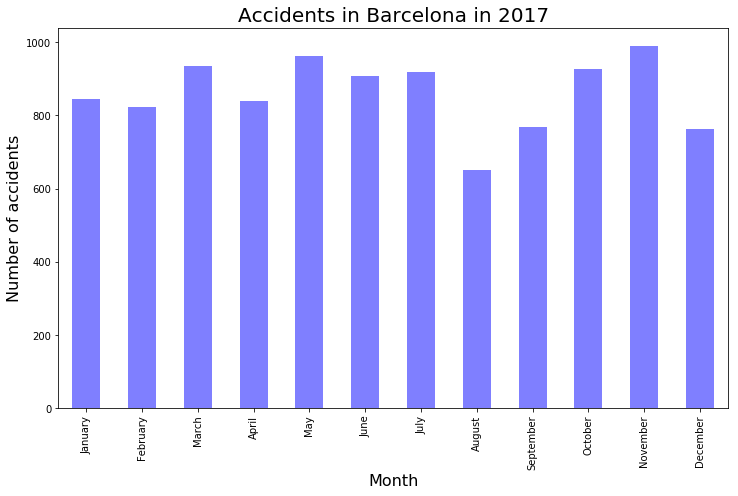

In [53]:
# plot accidents per month
accidents_month.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5)

# title and x,y labels
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

In [54]:
# Number of accident per day of the week
accidents_day = df.groupby(df['date'].dt.dayofweek).count().date

In [55]:
# Replace the day integers by day names.
accidents_day.index=[calendar.day_name[x] for x in range(0,7)]

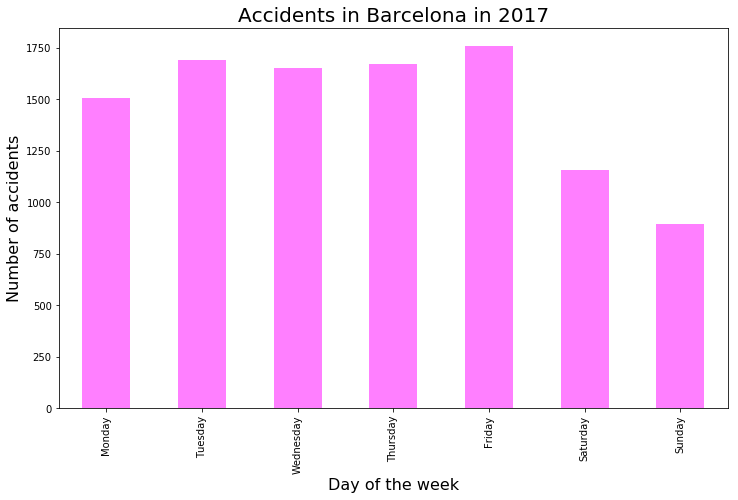

In [56]:
# plot accidents per day
accidents_day.plot(kind='bar',figsize=(12,7), color='magenta', alpha=0.5)

# title and x,y labels
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

# Distribution of car accidents per day of the week

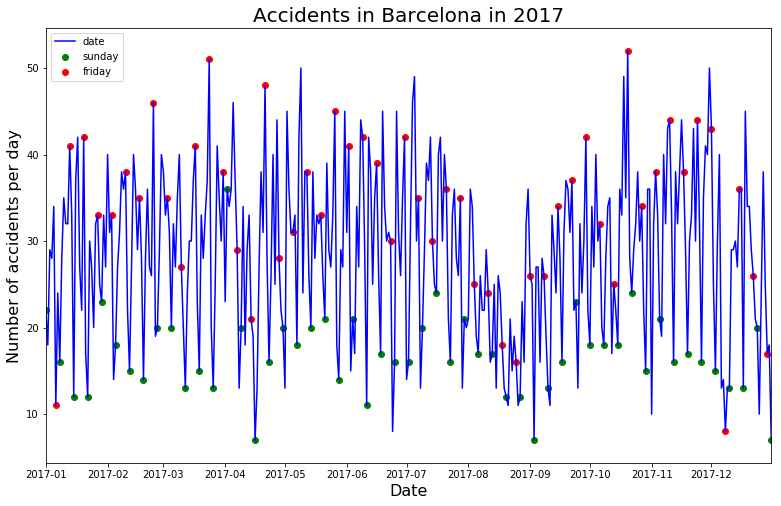

In [57]:
accidents = df.groupby(df['date'].dt.date).count().date
accidents.plot(figsize=(13,8), color='blue')
# sunday accidents
sundays = df.groupby(df[df['date'].dt.dayofweek==6].date.dt.date).count().date
plt.scatter(sundays.index, sundays, color='green', label='sunday')
# friday accidents
friday = df.groupby(df[df['date'].dt.dayofweek==4].date.dt.date).count().date
plt.scatter(friday.index, friday, color='red', label='friday')

# Title, x label and y label
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of accidents per day',fontsize=16);
plt.legend()

# Distribution of car accidents per hour

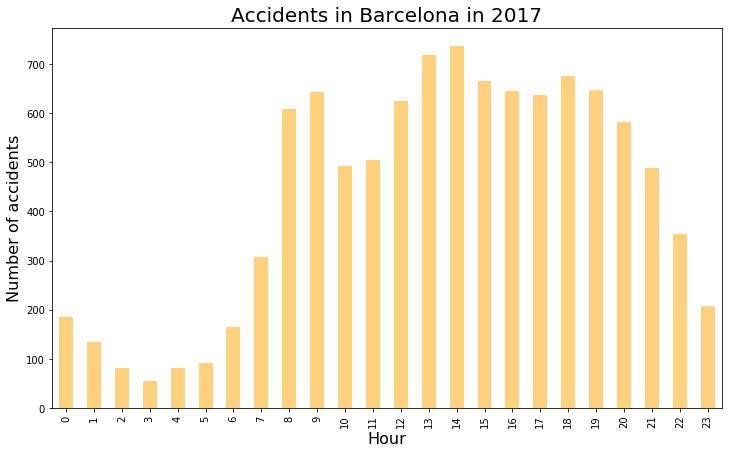

In [58]:
# Number of accident per hour
accidents_hour = df.groupby(df['date'].dt.hour).count().date

# plot accidents per hour
accidents_hour.plot(kind='bar',figsize=(12,7), color='orange', alpha=0.5)

# title and x,y labels
plt.title('Accidents in Barcelona in 2017', fontsize=20)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

# Distribution of car accidents per day of the week and hour

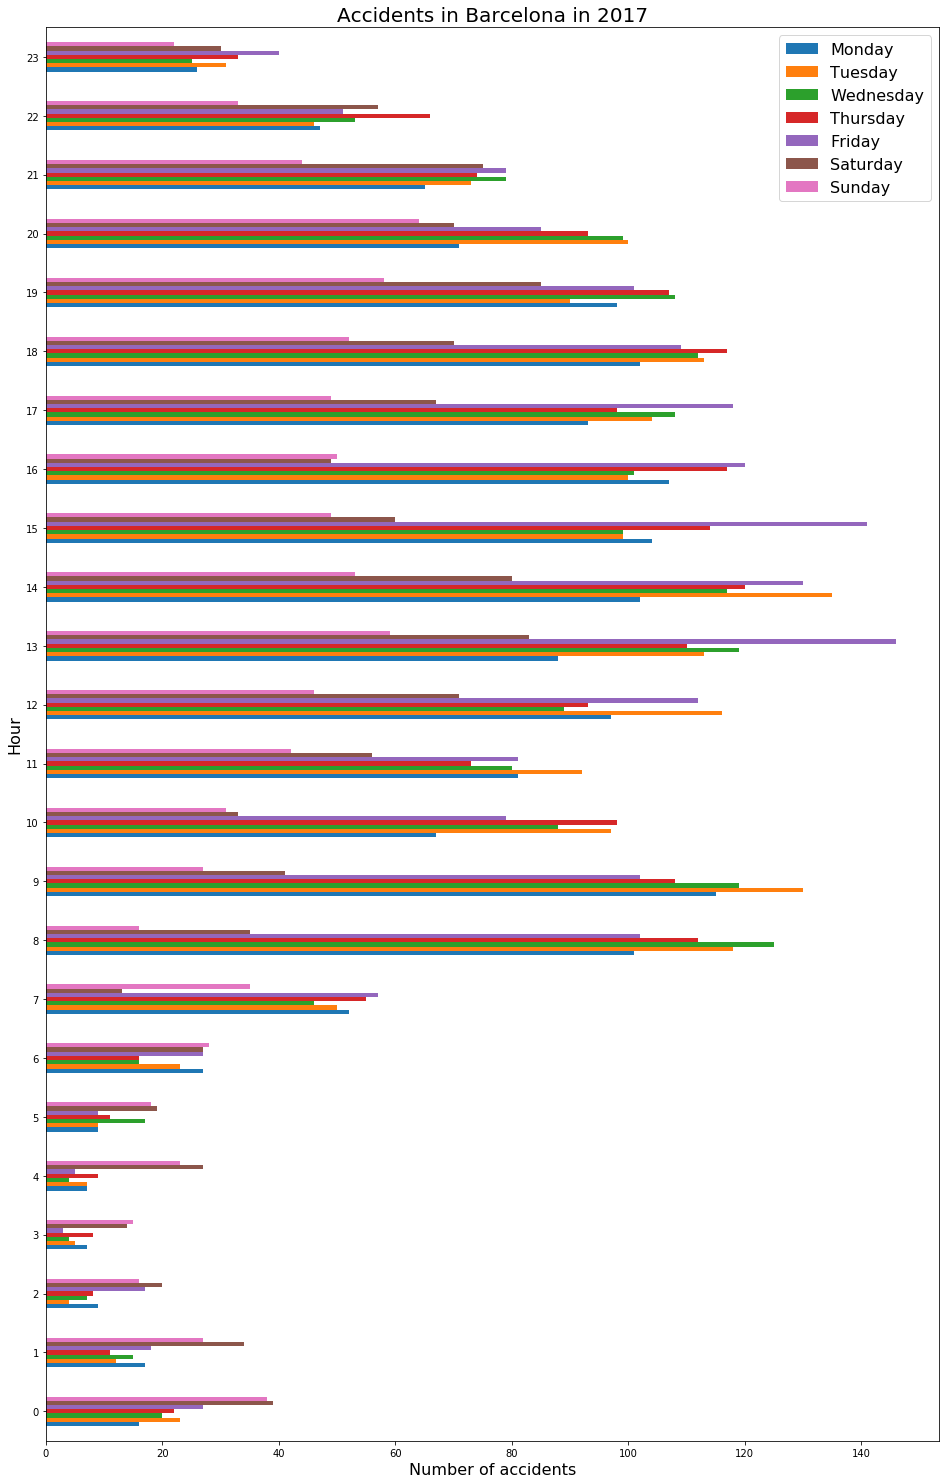

In [59]:
# Number of accident per hour and day
accidents_hour_day = df.groupby([df['date'].dt.hour.rename('hour'),df['date'].dt.dayofweek.rename('day')]).count().date

accidents_hour_day.unstack().plot(kind='barh', figsize=(16,26))

# title and x,y labels
plt.legend(labels=[calendar.day_name[x] for x in range(0,7)],fontsize=16)
plt.title('Accidents in Barcelona in 2017',fontsize=20)
plt.xlabel('Number of accidents',fontsize=16)
plt.ylabel('Hour',fontsize=16);

# Vehicles involved

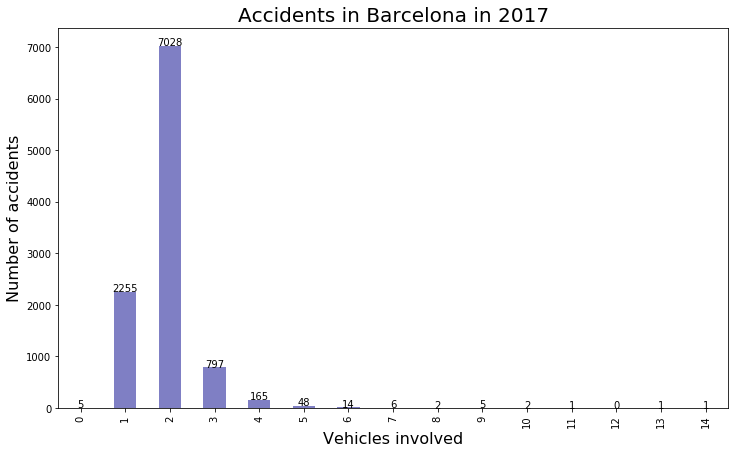

In [60]:
# Compute the number of accidents according to the number of vehicles involved
vehicles_involved = df.vehicles_involved.value_counts()
# There is no car accident with 12 vehicles involved. We include 0 in our Serie for better visualization
vehicles_involved[12]=0

vehicles_involved.sort_index(inplace=True)

# Plot number of car accidents according to the number of vehicles involved
vehicles_involved.plot(kind='bar',figsize=(12,7), color='darkblue', alpha=0.5)

# Title and x,y labels
plt.title('Accidents in Barcelona in 2017',fontsize=20)
plt.xlabel('Vehicles involved',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

# Print a label above each bar indicating the number of accidents
for index in vehicles_involved.index:
    plt.text(x=index,y=vehicles_involved.loc[index],s=str(vehicles_involved.loc[index]),horizontalalignment='center')

# Mild — Serious injuries

Text(0, 0.5, '')

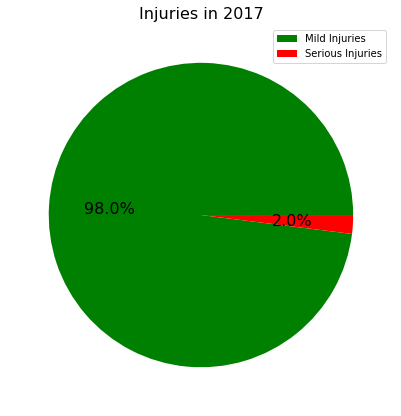

In [61]:
# Serie with number of mild injuries and serious injuries
injuries = df[['mild_injuries','serious_injuries']].sum()

# Pie plot with the percentage of victims with mild and serious injuries
injuries.plot(kind='pie',figsize=(7,7), colors=['green','red'], labels=None, autopct='%1.1f%%', fontsize=16)

# Legend and title
plt.legend(labels=['Mild Injuries', 'Serious Injuries'])
plt.title('Injuries in 2017', fontsize=16)
plt.ylabel('')

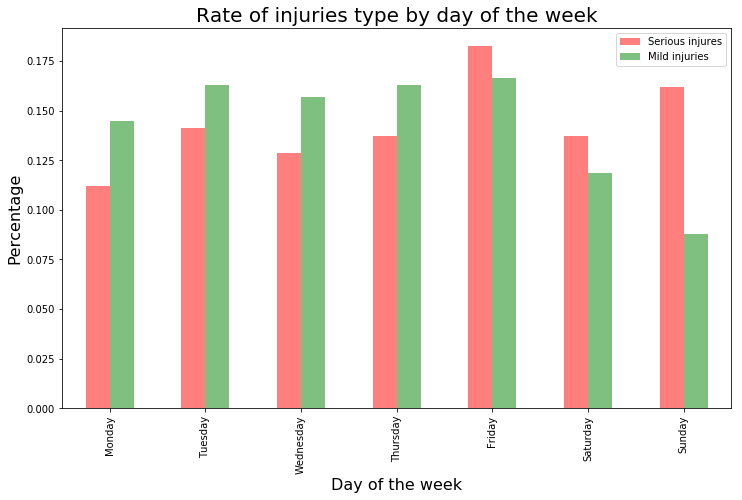

In [62]:
# Number of serious injuries per day of the week
accidents_serious = df[df['serious_injuries']!=0].groupby(df['date'].dt.dayofweek).sum().serious_injuries
# Percentage of serious injuries per day of the week
rate_serious = accidents_serious/accidents_serious.sum()

# Number of mild injuries per day of the week
accidents_mild = df[df['mild_injuries']!=0].groupby(df['date'].dt.dayofweek).sum().mild_injuries
# Percentage of mild injuries per day of the week
rate_mild = accidents_mild/accidents_mild.sum()

# Combine both series as a dataframe in order to plot them as a side by side bar
rates = pd.DataFrame({'Serious injures':rate_serious,'Mild injuries':rate_mild})
rates.plot(kind='bar',figsize=(12,7),color=['red','green'],alpha=0.5)

# Title and labels
plt.title('Rate of injuries type by day of the week',fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Percentage',fontsize=16)
plt.xticks(np.arange(7),[calendar.day_name[x] for x in range(0,7)]);

In [63]:
import folium

# Define a map centered around Barcelona
barcelona_map = folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Display the map
barcelona_map

In [66]:
# Create a map object of the city of Barcelona
barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(df.latitude, df.longitude, df.serious_injuries.astype(str)):
    if label!='0':
        folium.CircleMarker(
            [lat, lng],
            radius=3,
            color='red',
            fill=True,
            popup=label,
            fill_color='darkred',
            fill_opacity=0.6
        ).add_to(barcelona_map)
    
# Show map
barcelona_map

In [65]:
from folium import plugins

# Create a map object of the city of Barcelona
barcelona_map= folium.Map(location=[41.38879, 2.15899], zoom_start=12)

# Instantiate a mark cluster object for the car accidents
accidents = plugins.MarkerCluster().add_to(barcelona_map)

# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(df.latitude, df.longitude, df.serious_injuries.astype(str)):
    if label!='0':
        folium.Marker(
            location=[lat, lng],
            icon=None,
            popup=label,
        ).add_to(accidents)

# Display map
barcelona_map